In [2]:
## testing PER_beahvior

## rewriting scipy peaks with a library


# import stuff
import peaks #my library

import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint
import os
os.listdir(os.getcwd())
import csv as csv
import json as json
import scipy as scipy
from scipy.signal import find_peaks
import h5py


##### get paths ##########
date = '20230505'
fly_id_date_code = f'b-{date[-4:]}' ##'b-0407'
fly_number = 1

#Path = 'G:/bruker vid 2023/20230407/results/'  #path to results files from read ROIs or DLC
#Path = f'E:/bruker_vid_2023/{date}/results/'  #path to results files from read ROIs or DLC
Path = f'H:/{date}/results/'  #path to results files from read ROIs or DLC



# SavePath = Path + 'h5_files/'
# peaks.make_dirs(SavePath)

local_path = f"C:/Users/ashsm/Documents/Stanford/bruker behavior/{date}"
SavePath = local_path + 'h5_files/'
peaks.make_dirs(SavePath)



####   mostly static variables  ########
data_reducer = 100
voltage_framerate = 10000/data_reducer #frames/s # 1frame/.1ms * 1000ms/1s = 10000f/s
#with reducer i get 1 frame for every .1 * 100 ms => frame/.1*100 ms * 1000ms/s = 100f/s
#each "frame" is 0.1ms
video_framerate = 200 #f/s
video_framerate = 38.02
#video_framerate_downstairs = 33

video_framerate = 38.87 #for 512 fly1
h5files = [file for file in os.listdir(SavePath) if '.h5' in file]
print('not dlc', h5files)
dlc_h5_file = f"C:/Users/ashsm/Documents/Stanford/bruker behavior/h5files_dlc/{date}_fly{fly_number}_dlc.h5"
roi_h5 = f'{date}_fly_number_{fly_number}_.h5'
roi_h5_file = os.path.join(SavePath, roi_h5)
print(roi_h5_file)

voltage_path = f"C:/Users/ashsm/Documents/Stanford/bruker behavior/voltage/{date}/"
#light_peaks_h5 = f'light_peaks_fly{fly_number}.h5'
light_peaks_h5 = f'fly{fly_number}_light_peaks.h5'
light_peaks_file = os.path.join(voltage_path, light_peaks_h5)
# voltage_file = "C:/Users/ashsm/Documents/Stanford/bruker behavior/voltage/20230616/fly2_func-001_Cycle00001_VoltageRecording_001.csv"

not dlc ['20230505_fly_number_1_.h5']
C:/Users/ashsm/Documents/Stanford/bruker behavior/20230505h5_files/20230505_fly_number_1_.h5


In [5]:





#

#files = os.listdir(Path)
files = os.listdir(local_path)
Path = local_path
# voltage_files = peaks.check_for_voltage_file(voltage_path)
# print(voltage_files)
voltage_files = None

roi_files = peaks.check_for_results_file(Path)

#look at voltage and roi files and add data to h5 file based on fly#
if roi_files is not None:
    for roi_file in roi_files:
        fly_number = peaks.find_fly_number(roi_file)
        h5_filename = f'{date}_fly_number_{fly_number}_.h5'
        h5_Path = os.path.join(SavePath, h5_filename)
        data = peaks.import_roi_results(os.path.join(Path, roi_file))
        peaks.add_to_h5(h5_Path, 'roi data', data)
        if peaks.check_for_key(h5_Path, 'fly-id') == False:
            fly_id = f'{fly_id_date_code}-{fly_number}'
            peaks.add_to_h5(h5_Path, 'fly-id', fly_id)
            print(fly_id)
        
if voltage_files is not None:
    for voltage_file in voltage_files:
        fly_number = peaks.find_fly_number(voltage_file)
        h5_filename = f'{date}_fly_number_{fly_number}_.h5'
        print(f'found voltage file {voltage_file} for fly {fly_number}')
        h5_Path = os.path.join(SavePath, h5_filename)
        data = peaks.import_voltage_data(os.path.join(voltage_path, voltage_file))
        #peaks.add_to_h5(h5_Path, 'voltage data', data)
        titles = peaks.get_mean_titles(data)
        print(titles)
        print(type(titles))
        with h5py.File(h5_Path, 'a') as f:
            dt = h5py.special_dtype(vlen=str)
            if 'voltage_header' in f.keys():
                del f['voltage_header']
            new_titles = [title.encode('utf-8', 'surrogateescape') for title in titles[0][0]]
            dset = f.create_dataset('voltage_header', len(titles[0][0]), dtype=dt, data = new_titles)
            if 'voltage data st' in f.keys():
                del f['voltage data st']
            dset = f.create_dataset('voltage data st', np.shape(data), dtype=dt, data = data)
            

            #f.attrs["voltage header"] = titles[0][0]
        #peaks.add_to_h5(h5_Path, 'voltage header', titles[0][0])
        if peaks.check_for_key(h5_Path, 'fly-id') == False:
            fly_id = f'{fly_id_date_code}-{fly_number}'
            peaks.add_to_h5(h5_Path, 'fly-id', fly_id)
            print(fly_id)


#set framerate
 # **!!  change so code just asks is voltage framerate or video framerate needed


#set interval time
##since most of my experiments are switch do I need this?
interval_time = None ##decide if I should change this later

#set fly numbers 
# #(should be set when import data)


#get peaks for light and PER
##look at every flies h5 file and open and run peaks 
#    (note: some light data may be in roi file)
#  if there is more than one mean in the data then it will return a list of list of peaks for each mean

##make plots

#smooth PER peaks 

#find onset of PER peaks
#find indiv

#

b-0505-1
b-0505-2


In [ ]:
print(np.shape(titles))
print(titles[0][0])

In [ ]:
##cureently trying to import voltage to sort out framerate
##then see if flies respond to light ok
##see if I can get light times from voltage data--running voltage peaks

C:/Users/ashsm/Documents/Stanford/bruker behavior/20230505h5_files/20230505_fly_number_1_.h5
<KeysViewHDF5 ['fly-id', 'roi data']>
b'b-0505-1'
True
[b'Mean(Light)' b'Mean(PER)']
(171204, 2)
titles are [[b'Mean(Light)' b'Mean(PER)']]
current mean title is b'Mean(Light)'
light
current mean title is b'Mean(PER)'
PER
(171203,)


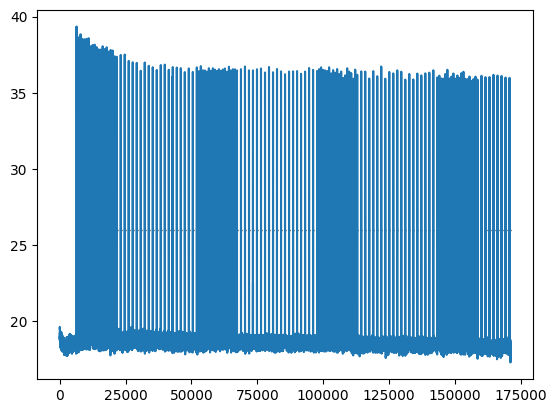

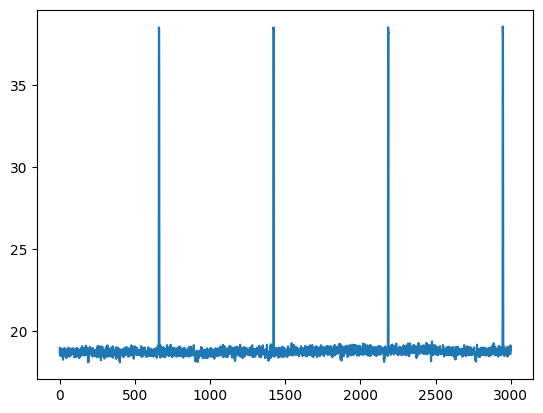

C:/Users/ashsm/Documents/Stanford/bruker behavior/20230505h5_files/20230505_fly_number_2_.h5
<KeysViewHDF5 ['fly-id', 'roi data']>
b'b-0505-2'
True
[b'Mean(Light)' b'Mean(PER)']
(142266, 2)
titles are [[b'Mean(Light)' b'Mean(PER)']]
current mean title is b'Mean(Light)'
light
current mean title is b'Mean(PER)'
PER
(142265,)


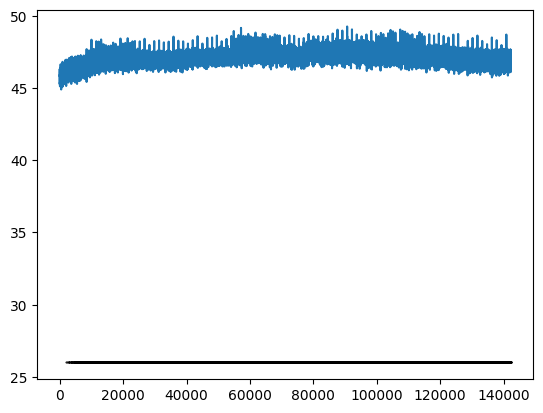

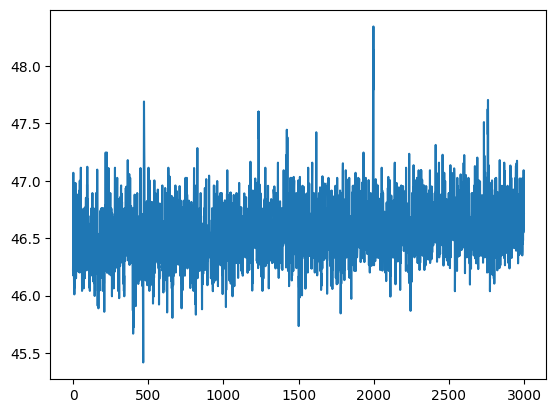

In [6]:
# video_framerate = 38.02
video_framerate = 38.066
h5files = [file for file in os.listdir(SavePath) if '.h5' in file]

for fly in h5files:
    each_path = os.path.join(SavePath, fly)
    print(each_path)
    with h5py.File(each_path, 'a') as f:
        print(f.keys())
        print(f['fly-id'][()])
        fly_id = f['fly-id'][()]
        if 'roi data' in f.keys():
            roi_data = f['roi data'][()]
            # print(roi_data[0:10])
            # print(roi_data[0][0])
            if 'Mean' in str(roi_data[0]):
                print(True)
                print(roi_data[0])
            #print(peaks.is_column_mean(roi_data, 0, 0))
            print(np.shape(roi_data))
            data_peaks, properties, columns = peaks.get_peaks(roi_data, each_path, video_framerate, prominence = 10)
            #print(np.shape(data_peaks))
            # print(properties)
            # print(properties['left_bases'])
            peaks.add_to_h5(each_path, 'roi peak left bases', properties['left_bases'])
            # plt.scatter(data_peaks[0][10:20], np.ones(len(data_peaks[0][10:20])))
            # plt.title(f'data peaks from roi data in frames through expt {roi_data[0]}')
            # #plt.plot(columns)
            # plt.show()

            #plt.plot(roi_data[0])
            #print(roi_data[0:10])
            light_data = peaks.get_means(roi_data, 0)
            print(np.shape(light_data))
            peaks.add_to_h5(each_path, 'raw light', light_data)
            plt.plot(light_data)
            plt.scatter(data_peaks[0], np.ones(len(data_peaks[0]))*26, s = .2, color = 'k')
            plt.show()

            plt.plot(light_data[8000:11000])
            
            plt.show()

            # data_peaks[0] = np.array(data_peaks[0])
            # raw_roi_diff = data_peaks[0][1:] - data_peaks[0][0:-1]
            # plt.hist(raw_roi_diff[1:], bins = 100)
            # plt.title(f'histogram of time between peaks for roi peaks frames {roi_data[0]}')
            # plt.show()
        if 'voltage data' in f.keys():
            voltage_data = f['voltage data'][()]
            voltage_header = f['voltage_header'][()]
            voltage_data_st = f['voltage data st'][()]
            #voltage_path = 
            #voltage_peaks, voltage_properties, voltage_columns = peaks.get_peaks(voltage_data, each_path, voltage_framerate)


C:/Users/ashsm/Documents/Stanford/bruker behavior/20230505h5_files/20230505_fly_number_1_.h5
<KeysViewHDF5 ['PER peaks', 'PER peaks sec', 'fly-id', 'light peaks', 'light peaks sec', 'raw light', 'roi data', 'roi peak left bases']>
b'b-0505-1'


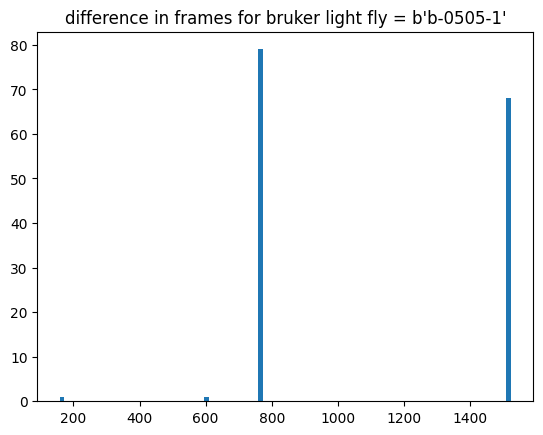

18.6879840366961
39.3544061302682
18.624521072796934
diff [   1    1    1  759    1    1    1  760    1    1  760    1    1    1
  759    1    1    1  759    1    1    1  760    1    1  760    1    1
    1  759    1    1    1  760    1    1  760    1    1    1  759    1
    1    1  759    1    1    1  760    1    1  760    1    1    1  759
    1    1    1  760    1    1  760    1    1    1  759    1    1    1
  759    1    1    1  760    1    1 1518    1    1    1 1518    1    1
    1 1518    1    1    1 1518    1    1 1518    1    1    1 1518    1
    1    1 1518    1    1    1 1518    1    1    1 1518    1    1 1518
    1    1    1 1518    1    1    1 1518    1    1    1 1518    1    1
 1518    1    1    1 1518    1    1    1 1518    1    1    1 1518    1
    1 1518    1    1    1 1518    1    1    1 1518    1    1    1  759
    1    1    1  759    1    1    1  760    1    1    1  759    1    1
    1  759    1    1    1  760    1    1  760    1    1    1  759    1
    1    1  759    

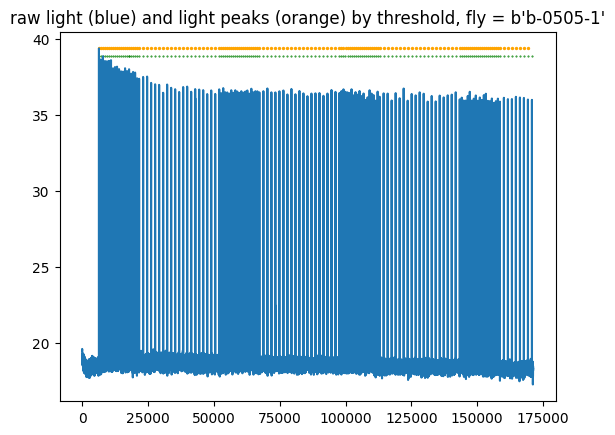

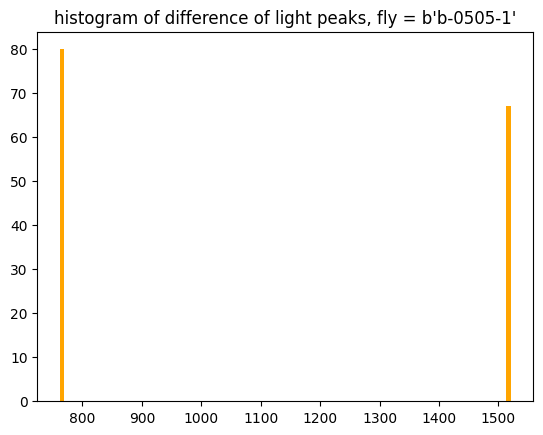

update [ 762  762  763  762  762  762  763  762  762  763  762  762  762  763
  762  762  763  762  762  762 1521 1521 1521 1520 1521 1521 1521 1521
 1520 1521 1521 1521 1520 1521 1521 1521 1520 1521 1521 1521  762  762
  763  762  762  762  763  762  762  762  763  762  762  763  762  762
  762  763  762  762 1521 1521 1521 1520 1521 1521 1521 1520 1521 1521
 1521 1520 1521 1521 1521 1520 1521 1521 1521 1520  763  762  762  763
  762  762  762  763  762  762  763  762  762  762  763  762  762  763
  762  762 1521 1521 1520 1521 1521 1521 1520 1521 1521 1521 1520 1521
 1521 1521 1521 1520 1521 1521 1521 1520  763  762  762  763  762  762
  762  763  762  762  762  763  762  762  762  763  762  762  763  762
 1521 1520 1521 1521 1521 1520 1521]
1107.9795918367347
[762 762 763 762 762 762 763 762 762 763 762 762 762 763 762 762 763 762
 762 762 762 762 763 762 762 762 763 762 762 762 763 762 762 763 762 762
 762 763 762 762 763 762 762 763 762 762 762 763 762 762 763 762 762 762
 763 762

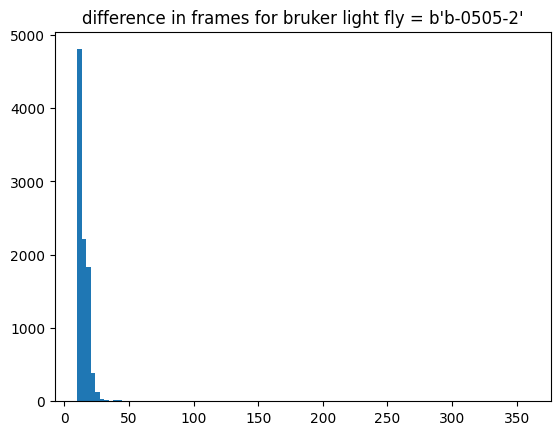

47.113991397925666
49.256198347107436
47.15426997245179
diff [1524  761  762 6101 2285 1525  763 1521 1519    1 3040    2 1521 3042
 1518    2 1519 1522 3041 1520    2 3040    1    1 1519    1 1519    2
 1521 1518    1    2 1518    1    1    1  760    1    1  760    1    1
  761    1    1  759    1    1    1  760    2  760    1    1  760    1
    1    1  760    1    1  760    1    1  760    1    1    1  759    1
    1    1  760    1    1  761    1  760    1    1    1  759    1    1
    1  760    1    1  760    1    1  760    2    1  760    1    1  760
    2    1 1518    1 1520    1    1 1518    3 1518    1    1 1519    1
    1 1519    1    1  335  457  726    1    1    1  645   75   93  179
  526    1    2   19 1213  286    1    1 1084   24  411    1    1 1520
    1  505  302  269   39  403    1    1    1   58  757  703    1    1
    1  396  557  121   27  280  137    1    1  242  198  260   47  772
    1    1 1426   92    2    1  586  135  797    1  349   67    7   52
   65    5  167 

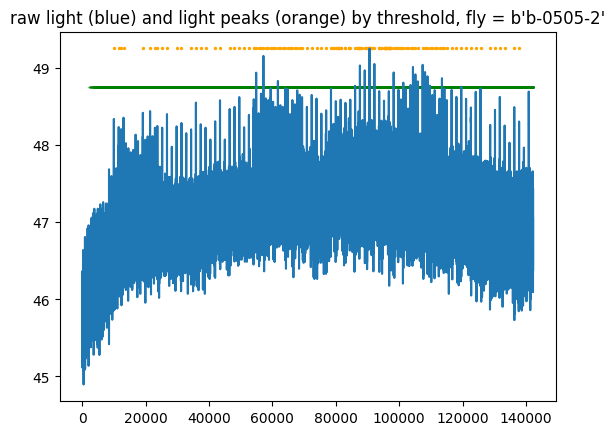

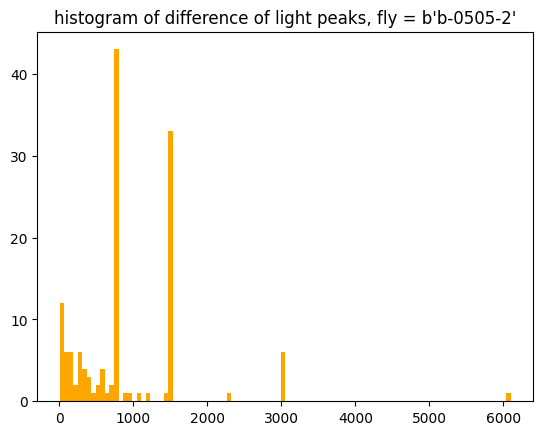

update [1524  761  762 6101 2285 1525  763 1521 1520 3042 1521 3042 1520 1519
 1522 3041 1522 3042 1520 1521 1521 1521 1521  762  762  763  762  762
  762  763  762  762  763  762  762  762  763  762  762  762  763  762
  763 1519 1522 1521 1520 1521 1521  335  457  729  645   75   93  179
  529   19 1213  288 1084   24  413 1521  505  302  269   39  406   58
  757  706  396  557  121   27  280  139  242  198  260   47  774 1426
   95  586  135  798  349   67    7   52   70  167  357   61  360   32
  259   64  137   81  980  608  913  611  151  762  763  762  762  763
  762  762 1525  762  762  763  762  762  762  763  762  761  764 1520
 1521 1520 1522 1520 1520 1522 3042 1519 1520 1521 3041 1523]
926.4855072463768
[761 762 763 762 762 763 762 762 762 763 762 762 763 762 762 762 763 762
 762 762 763 762 763 335 457 729 645  75  93 179 529  19 288  24 413 505
 302 269  39 406  58 757 706 396 557 121  27 280 139 242 198 260  47 774
  95 586 135 798 349  67   7  52  70 167 357  61 360  3

In [7]:
for fly in h5files:
    each_path = os.path.join(SavePath, fly)
    print(each_path)
    with h5py.File(each_path, 'a') as f:
        print(f.keys())
        print(f['fly-id'][()])
        fly_id = f['fly-id'][()]
        roi_peaks = f['light peaks'][()]
        diff = roi_peaks[1:] - roi_peaks[0:-1]
        plt.hist(diff, bins = 100)
        plt.title(f'difference in frames for bruker light fly = {fly_id}')
        plt.show()

        # plt.scatter(roi_peaks, np.ones(len(roi_peaks)))
        # plt.title(f'scatter of all peaks for fly = {fly_id}')
        # plt.show()

        # plt.scatter(roi_peaks[20:30], np.ones(len(roi_peaks[10:20])))
        # plt.title(f'subset of scatter of all peaks for fly = {fly_id}')
        # plt.show()

        light_data = f['raw light'][()]
        print(np.mean(light_data))
        print(np.max(light_data))
        print(np.median(light_data))
        cutoff = (np.max(light_data) - np.median(light_data))/2 + np.median(light_data)
        #cutoff = 35
        threshold = np.where(light_data>cutoff)[0]
        # plt.scatter(threshold, np.ones(len(threshold))*np.max(light_data), s = .2, color ='k')
        # plt.scatter(roi_peaks, np.ones(len(roi_peaks))*np.max(light_data)-.5, s = .2, color = 'green')
        
        # plt.plot(light_data)
        # plt.xlim(10000,20000)
        # plt.show()

        # th_diff = threshold[1:] - threshold[0:-1]
        # plt.hist(th_diff, bins = 100, color = 'black')
        # plt.title(f'difference in frames for bruker lightTHRESHOLD VERSION fly = {fly_id}')
        # plt.show()

        #find peak from threshold
        #find sets wehre the difference between frames is <10 
        # then find the frame where the light is the highest? or maybe I want the onset
        #th_peak = 
        diff = threshold[1:] - threshold[0:-1]
        print('diff',diff)
        update_threshold = np.where(diff>5)[0]
        print('threshold', threshold)



        new_threshold = threshold[update_threshold]
        print('new', new_threshold)
        plt.scatter(new_threshold, np.ones(len(new_threshold))*np.max(light_data), s = 2, color ='orange')
        plt.scatter(roi_peaks, np.ones(len(roi_peaks))*np.max(light_data)-.5, s = .2, color = 'green')
        peaks.add_to_h5(each_path, 'threshold light on', new_threshold)  ##in some cases this is the second framethe light is peaking at
        
        plt.plot(light_data)
        #plt.xlim(11000,25000)
        start = new_threshold[0]
        step = new_threshold[1] - new_threshold[0]
        stop = start + 900*20
        #plt.vlines(range(start, stop, step),20,40, color = 'red')
        #plt.scatter(range(start, stop, step), np.ones(20)*np.max(light_data)-1, s = 4, color = 'red', marker = "|")
        plt.title(f'raw light (blue) and light peaks (orange) by threshold, fly = {fly_id}')
        plt.show()

        update_diff = new_threshold[1:] - new_threshold[0:-1]
        plt.hist(update_diff, bins = 100, color = 'orange')
        plt.title(f'histogram of difference of light peaks, fly = {fly_id}')
        plt.show()

        print('update', update_diff)

        #calculate framerate
        print(np.mean(update_diff))
        mean_diff = np.mean(update_diff)
        twenty = update_diff[update_diff<mean_diff]
        forty = update_diff[update_diff > mean_diff]

        print(twenty)
        print(forty)

        calc_framerate = (np.mean(twenty)/20 + np.mean(forty)/40)/2
        print(calc_framerate)
        peaks.add_to_h5(each_path, 'calculated framerate', calc_framerate)


In [8]:
## calculate framerate

# 762 = 20s
# 1521 = 40s
print(762/20)
print(1520/40)

print(np.mean(update_diff))
mean_diff = np.mean(update_diff)
twenty = update_diff[update_diff<mean_diff]
forty = update_diff[update_diff > mean_diff]

print(twenty)
print(forty)

calc_framerate = (np.mean(twenty)/20 + np.mean(forty)/40)/2
print(calc_framerate)





38.1
38.0
926.4855072463768
[761 762 763 762 762 763 762 762 762 763 762 762 763 762 762 762 763 762
 762 762 763 762 763 335 457 729 645  75  93 179 529  19 288  24 413 505
 302 269  39 406  58 757 706 396 557 121  27 280 139 242 198 260  47 774
  95 586 135 798 349  67   7  52  70 167 357  61 360  32 259  64 137  81
 608 913 611 151 762 763 762 762 763 762 762 762 762 763 762 762 762 763
 762 761 764]
[1524 6101 2285 1525 1521 1520 3042 1521 3042 1520 1519 1522 3041 1522
 3042 1520 1521 1521 1521 1521 1519 1522 1521 1520 1521 1521 1213 1084
 1521 1426  980 1525 1520 1521 1520 1522 1520 1520 1522 3042 1519 1520
 1521 3041 1523]
35.100224014336916


In [ ]:

raw_roi_diff = roi_peaks[1:] - roi_peaks[0:-1]

plt.hist(raw_roi_diff[1:], bins = 100)
plt.title('histogram of time between peaks for roi peaks frames')
plt.show()

print(raw_roi_diff)
plt.scatter(raw_roi_diff, range(len(raw_roi_diff)))

In [ ]:
# import peaks
# mean_titles = peaks.get_mean_titles(roi_data)
# mean_indices = peaks.get_mean_indices(roi_data)
# print(mean_titles[0][mean_index])
# for mean_index in mean_indices:
#     if peaks.is_column_light(mean_titles, 0, mean_index) or 'diode' in str(mean_titles[0][mean_index]) or 'light' in str(mean_titles[0][mean_index]) or 'Input 0' in str(mean_titles[0][mean_index]):
#         print('light')
#     else:
#         print('per')
# peaks.get_peaks(roi_data, each_path,  video_framerate, override = False, prominence = 3, distance = 15)

In [ ]:
# print(os.listdir(voltage_path))
# light_peaks_file = os.path.join(voltage_path, 'light_peaks_fly1.h5')

# with h5py.File(light_peaks_file, 'r') as f:
#     print(f.keys())
#     light_peaks_ms = f['light peaks ms'][()]


In [ ]:
# print(len(mean_titles[0][0]))
# for i in mean_titles[0][0]:
#     if "Input 0" in str(i):
#         print(f'yes{i}')

# #single = peaks.get_means(voltage_data, mean_indices)
# print(peaks.is_column_in_list(str(voltage_data), 0, 0, 'Input 0'))
# print(str(voltage_data[0][0]))
# print(single)

C:/Users/ashsm/Documents/Stanford/bruker behavior/h5files_dlc/20230505_fly1_dlc.h5
C:/Users/ashsm/Documents/Stanford/bruker behavior/20230505h5_files/20230505_fly_number_1_.h5
['20230505_fly_number_1_.h5', '20230505_fly_number_2_.h5']
<KeysViewHDF5 ['DLC peaks unfiltered', 'difference', 'extend_likelihood', 'extend_x', 'extend_y', 'extension difference', 'head_likelihood', 'head_x', 'head_y', 'median and std filtered DLC peaks', 'median filtered DLC peaks', 'neck difference', 'neck_likelihood', 'neck_x', 'neck_y', 'proboscis_likelihood', 'proboscis_x', 'proboscis_y']>
<KeysViewHDF5 ['PER peaks', 'PER peaks sec', 'calculated framerate', 'fly-id', 'light peaks', 'light peaks sec', 'raw light', 'roi data', 'roi peak left bases', 'threshold light on']>


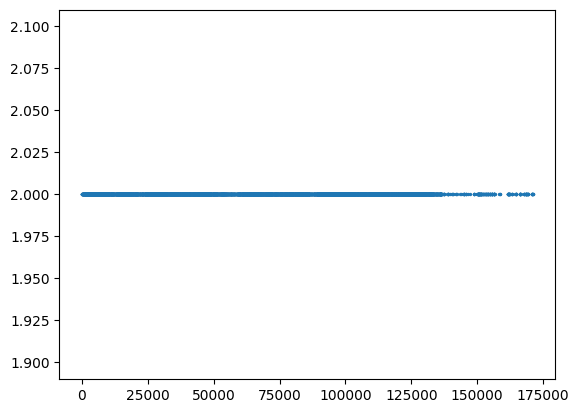

In [9]:
print(dlc_h5_file)
print(roi_h5_file)
print(os.listdir(SavePath))

#print(os.listdir(voltage_path))
# print(light_peaks_file)
# with h5py.File(light_peaks_file, 'r') as f:
#     print(f.keys())
#     light_peaks_ms = f['light peaks ms'][()]


with h5py.File(dlc_h5_file, 'a') as f:
    print(f.keys())
    dlc_filtered_peaks = f['median and std filtered DLC peaks'][()]

with h5py.File(roi_h5_file, 'a') as f:
    print(f.keys())
    roi_peaks = f['PER peaks'][()]
    roi_peaks_s = f['PER peaks sec'][()]
    #light_peaks_roi = f['light peaks'][()]
    #light_peaks_s_roi = f['light peaks sec'][()]
    roi_data = f['roi data'][()]
    # voltage_data = f['voltage data'][()]
    # voltage_header = f['voltage_header'][()]
    #onsets = f[]

#plt.scatter(dlc_filtered_peaks, np.ones(len(dlc_filtered_peaks)))
plt.scatter(roi_peaks, np.ones(len(roi_peaks))*2, s = 2)
plt.show()
#print(voltage_header)

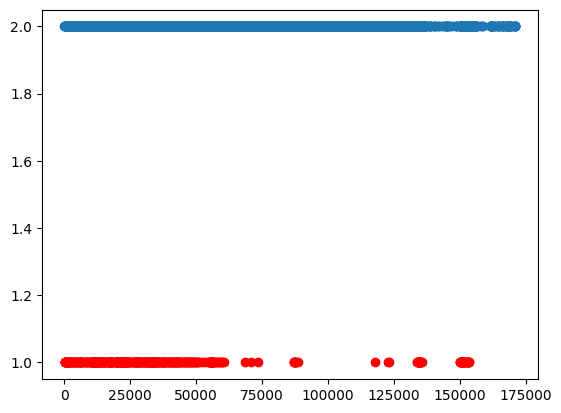

In [10]:
plt.scatter(dlc_filtered_peaks, np.ones(len(dlc_filtered_peaks)), color = 'red')
plt.scatter(roi_peaks, np.ones(len(roi_peaks))*2)
#plt.xlim(25000,50000)
plt.show()

In [11]:
## FIGURE OUT THE FRAMERATE OF THE VIDEO!


#things I know (the times in seconds of the light from bruker = light_peaks_s_diode)
##the frames the light comes on in the behavior vid = light_peaks_roi
## => if I subtract the light times in roi and the light peaks in diode I should get a frames to second reference

light_peaks_s_diode = light_peaks_ms/1000

diode_diff = light_peaks_s_diode[1:] - light_peaks_s_diode[0:-1]
frames_diff = light_peaks_roi[1:] - light_peaks_roi[0:-1]
diode_diff = np.array(diode_diff)
print(frames_diff)
print(np.where(frames_diff < 200))
plt.plot(frames_diff, color = 'blue')
plt.plot(diode_diff, color = 'orange')
plt.title('diode s diff (orange) and behavior frame diff(blue)')
plt.show()



diode_20_diff = diode_diff[diode_diff < 30]
diode_40_diff = diode_diff[diode_diff > 30]
plt.plot(diode_20_diff)
plt.title('diode 20s difference')
plt.show()

print(np.mean(diode_20_diff))
print(np.mean(diode_40_diff))

frames_20_diff = frames_diff[frames_diff < 1200]
frames_40_diff = frames_diff[frames_diff > 1400]
print('frames 40', frames_40_diff)
print('f20 diff', np.mean(frames_20_diff))
print('f40 diff', np.mean(frames_40_diff[1:]))
plt.plot(frames_40_diff[1:])
plt.title('difference for frames for 40s')
plt.show()
plt.plot(frames_20_diff)
plt.title('difference for frames for 20s')
plt.show()

plt.plot(frames_20_diff[20:])
plt.title('difference for frames for 20s')
plt.show()


# frames_20_diff = frames_diff[15 < frames_diff < 30]
# frames_40_diff = frames_diff[50 < frames_diff > 30]

print('diode_diff', diode_diff)
print('frames_diff', frames_diff)
plt.plot(frames_diff)
plt.show()
plt.plot(diode_diff)
plt.show()
from scipy import stats

##new framerate calculation
print('statistics')
print(f'median {np.median(frames_20_diff)}')
print(f'mode {stats.mode(frames_20_diff)}')
print(f'mean {np.mean(frames_20_diff)}')

fr_20 = np.mean(frames_20_diff[frames_20_diff > 500])/np.mean(diode_20_diff)
print(fr_20)
fr_40 = np.mean(frames_40_diff[frames_40_diff < 2000])/np.mean(diode_40_diff)
print(fr_40)
new_framerate = (fr_20 + fr_40) / 2
print('new_framerate', new_framerate)

alt_framerate_20 = np.median(frames_20_diff)/np.mean(diode_20_diff)
alt_framerate_40 = np.median(frames_40_diff)/np.mean(diode_40_diff)
alt_framerate = (alt_framerate_20 + alt_framerate_40)/2
print(alt_framerate)





NameError: name 'light_peaks_ms' is not defined

In [ ]:
# alt_framerate_20 = np.median(frames_20_diff)/np.mean(diode_20_diff)
# print(alt_framerate_20)
# alt_framerate_40 = np.median(frames_40_diff)/np.mean(diode_40_diff)
# print(alt_framerate_40)
# alt_framerate = (alt_framerate_20 + alt_framerate_40)/2
# print(alt_framerate)
# print(np.mean(diode_20_diff))

# 16.23/20.1


In [ ]:
# #################################################################################
# ###  new way of getting framerate
# ## use a longer time span (start of 20s to end of 20s or another window)

# ##this may work worse


# where_frames_20 = np.where(frames_diff < 1200)[0]
# where_diode_20 = np.where(diode_diff < 30)[0]
# print(where_frames_20)
# print(where_diode_20)

# frame_transition = np.where((where_frames_20[1:] - where_frames_20[0:-1])>5)[0]
# print(frame_transition)
# diode_transition = np.where((where_diode_20[1:] - where_diode_20[0:-1])>5)[0]
# print(diode_transition)

# new_framerate = (light_peaks_roi[frame_transition[1]] - light_peaks_roi[frame_transition[0]]) / (light_peaks_s_diode[diode_transition[1]] - light_peaks_s_diode[diode_transition[0]])
# print(new_framerate)


#Histogram of ROI peaks after this

In [ ]:
print(len(light_peaks_s_roi))
print(len(light_peaks_s_diode))
roi_diff = light_peaks_s_roi[1:] - light_peaks_s_roi[0:-1]
diode_diff = light_peaks_s_diode[1:] - light_peaks_s_diode[0:-1]
raw_roi_diff = light_peaks_roi[1:] - light_peaks_roi[0:-1]
print(np.mean(roi_diff[roi_diff < 26]))
print(np.mean(diode_diff[diode_diff < 26]))
# print('roi', roi_diff[0:10])
# print('diode', diode_diff[0:10])

# print(light_peaks_s_roi[0:10])
# print(light_peaks_s_diode[0:10])

plt.hist(raw_roi_diff[1:], bins = 100)
plt.title('histogram of time between peaks for roi peaks frames')
plt.show()
plt.hist(roi_diff[1:], bins = 100)
plt.title('histogram of time between peaks for roi peaks s')
plt.show()
plt.hist(diode_diff, bins = 100)
plt.title('histogram of time between peaks for voltage peaks s')
plt.show()


# print(20.11/23.7)
# print(video_framerate/(20.10715050218694/24.091706119586185))
# new_framerate = video_framerate / (20.10715050218694/24.091706119586185)
# new_framerate = video_framerate * 1.22130117 
#new_framerate = 44.67705482419526 #with further adjustment from comparison of values

##calculated by taking the difference between light times from roi frames and comparing to the difference between light peaks from voltage
# then averageing (see notes). this is the best estimate I have
#new_framerate = 45.75734528504152 
#new_framerate = 45.84

#for i in range(10):
#new_framerate = 45.75 + i/100
#new_framerate = 45.78
new_framerate
print(alt_framerate)
print(new_framerate)


new_light_peaks_roi_s = light_peaks_roi/(new_framerate)
# print('light peak diff', new_light_peaks_roi_s[1:] - new_light_peaks_roi_s[0:-1])

print('light peak diff', new_light_peaks_roi_s[16:] - new_light_peaks_roi_s[15:-1])

new_roi_diff = new_light_peaks_roi_s[1:] - new_light_peaks_roi_s[0:-1]

plt.hist(new_roi_diff[1:], bins = 100)
plt.title('framerate adh histogram of time between peaks for roi peaks s')
plt.show()

#plt.scatter(new_light_peaks_roi_s, np.ones(len(new_light_peaks_roi_s)))
# plt.scatter(light_peaks_s_diode, np.ones(len(light_peaks_s_diode))*2)
# plt.xlim(1000,1100)
# plt.title(f'FR = {new_framerate}')
# plt.show()

print('roi',new_light_peaks_roi_s[0:10])
print('diode', light_peaks_s_diode[0:10])

print('roi length = ', len(new_light_peaks_roi_s))
print('diode length = ', len(light_peaks_s_diode))

# print(np.where(new_light_peaks_roi_s > 270))
# print('start of peaks?', new_light_peaks_roi_s[40:43])


##   for fly 2 6-30 start of real peaks is index = 41



#difference_s = new_light_peaks_roi_s[1:114] - light_peaks_s_diode
#difference_s = new_light_peaks_roi_s[0:len(light_peaks_s_diode)] - light_peaks_s_diode[0:]
difference_s = new_light_peaks_roi_s[18:len(light_peaks_s_diode)] - light_peaks_s_diode[18:] + 40


print('difference between roi and diode', difference_s)
plt.scatter(difference_s, np.ones(len(difference_s)), alpha = .4)
plt.title(f'FR = {new_framerate}')
plt.xlabel('difference between roi and light (s)')
plt.show()

plt.scatter(difference_s, np.ones(len(difference_s)), alpha = .4)
plt.title(f'FR = {new_framerate}')
plt.xlabel('difference between roi and light (s)')
plt.xlim(0,2)
plt.show()

plt.scatter(difference_s, np.ones(len(difference_s)), alpha = .4)
plt.title(f'FR = {new_framerate}')
plt.xlabel('difference between roi and light (s)')
plt.xlim(18,22)
plt.show()

plt.plot(difference_s)
plt.title(f'differencce between roi and light(s) over time \n FR = {new_framerate}')
plt.xlabel('number of light flashes')
plt.ylabel('difference in s')
plt.show()

print(new_framerate)
#plt.scatter(new_light_peaks_roi_s[1:114], light_peaks_s_diode, s = 8)
#plt.scatter(new_light_peaks_roi_s[0:len(light_peaks_s_diode)], light_peaks_s_diode[0:]) #, s = 8)
plt.scatter(new_light_peaks_roi_s[16:len(light_peaks_s_diode)], light_peaks_s_diode[16:]) #, s = 8)

# print(len(new_light_peaks_roi_s))
# print(len(light_peaks_s_diode))
plt.xlabel('behavior vid time of light (s)')
plt.ylabel('bruker voltage time of light (s)')
# plt.xlim(300,500)
# plt.ylim(300,500)
x = range(0,1000)
plt.plot(x,x, alpha = .2)
plt.title(f'FR = {new_framerate}')
plt.show()

#plt.scatter(new_light_peaks_roi_s[1:114], light_peaks_s_diode, s = 8)
plt.scatter(new_light_peaks_roi_s[0:len(light_peaks_s_diode)], light_peaks_s_diode[0:]) #, s = 8)
# print(len(new_light_peaks_roi_s))
# print(len(light_peaks_s_diode))
plt.xlabel('behavior vid time of light (s)')
plt.ylabel('bruker voltage time of light (s)')
plt.xlim(2700,3500)
plt.ylim(2700,3500)
x = range(0,3500)
plt.plot(x,x, alpha = .2)
plt.title(f'FR = {new_framerate}')
plt.show()



# 265.09096922 - 255.8046509
# new_light_peaks_roi_s = np.array(new_light_peaks_roi_s)
# adj_light_peaks_roi_s = new_light_peaks_roi_s - (265.09096922 - 255.8046509)

# print(adj_light_peaks_roi_s[-10:])
# print(light_peaks_s_diode[-10:])

# print(adj_light_peaks_roi_s[1:10])
# print(light_peaks_s_diode[1:10])

# plt.scatter(adj_light_peaks_roi_s, np.ones(len(adj_light_peaks_roi_s)))
# plt.scatter(light_peaks_s_diode, np.ones(len(light_peaks_s_diode))*2)
# plt.xlim(1000,1100)
# plt.show()

In [ ]:
print(len(light_peaks_s_diode))
print(len(new_light_peaks_roi_s[16:]))

In [ ]:
## get per post light (using diode light)

#light_peaks_s_diode
#dlc_filtered_peaks

print(len(dlc_filtered_peaks))
print(len(light_peaks_s_diode))

framerate = 47

##use framerate = 40?
dlc_peaks_s = dlc_filtered_peaks/framerate

# light_to_PER_time = np.asarray([p-light_times[light_times <= p][-1] for p in smoothed_decreases 
#     if p > light_times[0] and (p+1) not in light_times])
light_to_PER = []
for p in dlc_peaks_s:
    if p > light_peaks_s_diode[0] and (p+1) not in light_peaks_s_diode and p not in light_peaks_s_diode and p < light_peaks_s_diode[-1]:
        PER_time = []
        light_time = []
        light_time = light_peaks_s_diode[light_peaks_s_diode <=p][-1]
        #PER_times = p-light_up_50_fix[light_up_50_fix <= p][-1]
        PER_time = p - light_time
        #p is the actual time of the PER--could save this
        light_to_PER.append(PER_time)

##I need to split this by trial

#find times between light flashes
light_times = light_peaks_s_diode[1:]- light_peaks_s_diode[0:-1] 
#check that light peaks is single light peaks 
if len(np.where(light_times < difference)[0]):
    #light_peaks is taking more than one datapoint per peak
    raise Exception(f'WARNING: these are not single peaks check indices {np.where(light_times<15)[0]}')

#find switch points
light_times_diff = np.rint(abs(light_times[1:] - light_times[0:-1]))
switch_ind = np.where(light_times_diff > 15)[0] 
print('function', switch_ind)

twenty = []
forty = []
exp_length1 = 20
exp_length2 = 40
for i in range(len(switch_ind)):
    switch_index = switch_ind[i] 
    print(switch_index)
    print(light_times[switch_index])
    if i == 0:
        if exp_length1 - 5 < light_times[switch_index] < exp_length1 + 5:
            t = (0, switch_index + 1) #the + 1 helps it end and start at the same place
            twenty.append(t)
        elif exp_length2 - 5 < light_times[switch_index] < exp_length2 + 5:
            t = (0, switch_index + 1)
            forty.append(t)
    else:
        previous_index = switch_ind[i - 1] + 1 
        if exp_length1 - 5 < light_times[switch_index] < exp_length1 + 5:
            t = (previous_index, switch_index + 1)
            twenty.append(t)
        elif exp_length2 - 5 < light_times[switch_index] < exp_length2 + 5:
            t = (previous_index, switch_index + 1)
            forty.append(t)
twenty = np.array(twenty)
forty = np.array(forty)
print('20', twenty)
print('40',forty)

switch_times_s = light_peaks_s_diode[switch_ind]
print(switch_times_s)
twenty_times = []
forty_times = []
for i in twenty:
    twenty_times.append(light_peaks_s_diode[i][-1])
for i in forty:
    forty_times.append(light_peaks_s_diode[i][-1])


light_to_PER = []
twenty_PER_time = []
forty_PER_time = []
for p in dlc_peaks_s:
    if p > light_peaks_s_diode[0] and (p+1) not in light_peaks_s_diode and p not in light_peaks_s_diode and p < light_peaks_s_diode[-1]:
        PER_time = []
        light_time = []
        light_time = light_peaks_s_diode[light_peaks_s_diode <=p][-1]
        
        #PER_times = p-light_up_50_fix[light_up_50_fix <= p][-1]
        PER_time = p - light_time
        #p is the actual time of the PER--could save this
        light_to_PER.append(PER_time)

        #is this in a 20s experiment or a 40s experiment?
        if light_time < twenty_times[0]:
            twenty_PER_time.append(PER_time)
        elif twenty_times[0] < light_time < forty_times[0]:
            forty_PER_time.append(PER_time)
        elif forty_times[0] < light_time < twenty_times[1]:
            twenty_PER_time.append(PER_time)
        elif twenty_times[1] < light_time < forty_times[1]:
            forty_PER_time.append(PER_time)
        elif forty_times[1] < light_time < twenty_times[2]:
            twenty_PER_time.append(PER_time)
print(light_to_PER)
print(dlc_peaks_s)
print(np.shape(light_to_PER))
plt.hist(light_to_PER)
plt.show()

plt.hist(twenty_PER_time, bins = range(20))
plt.title(f'PER responses to light from bruker with fr = {framerate} \n 20s trials')
plt.xlabel('seconds after light flash')
plt.ylabel('number of PER')
plt.show()

plt.hist(forty_PER_time, bins = range(40))
plt.title(f'PER responses to light from bruker with fr = {framerate} \n 40s trials')
plt.ylabel('number of PER')
plt.xlabel('seconds after light flash')
plt.show()

In [ ]:
plt.scatter(light_peaks_s_diode, np.ones(len(light_peaks_s_diode)), s = 4)

In [ ]:
print(light_to_PER)
print(dlc_peaks_s)
print(np.shape(light_to_PER))
plt.hist(light_to_PER)

In [ ]:
##get PER afterlight

#1. need smoothed intensity decreases (aka PER_smooth_out)
print(roi_data)
print(np.shape(roi_data))

#def get_PER_column
header = roi_data[0]
print('header', header)
print(np.shape(header))
for i in range(len(header)):
    if 'PER' in str(header[i]):
        PER_column = i
reshape_means = np.transpose(roi_data[1:])
column = reshape_means[:][PER_column]
means = [float(i) for i in column]
print(np.shape(means))
means = np.array(means)

smoothed_threshold = 1
smoothed_means = means[:-2]/3 + means[1:-1]/3 + means[2:]/3
smoothed_decreases = smoothed_means[:-1] > (smoothed_means[1:] + smoothed_threshold)

#PER_smooth_out = np.nonzero(smoothed_intensity_decreases[:,PER_index_int]) may need to take nonzero

#2.need light times
print(os.listdir(voltage_path))
light_peaks_file = os.path.join(voltage_path, 'light_peaks_fly1.h5')

with h5py.File(light_peaks_file, 'r') as f:
    print(f.keys())
    light_peaks_ms = f['light peaks ms'][()]
    light_peaks_s_diode = light_peaks_ms/1000
#3.this may need to be written to get batches... or at least ignore probes

#possibly this 
light_to_PER_time = np.asarray([p-light_times[light_times <= p][-1] for p in smoothed_decreases 
    if p > light_times[0] and (p+1) not in light_times])



for p in smoothed_decreases:
    if p > light_up_50_fix[0] and (p+1) not in light_up_50_fix and p not in light_up_50_fix and p < light_up_50_fix[-1]:
        PER_time = []
        light_time = []
        light_time = light_up_50_fix[light_up_50_fix <=p][-1]
        #PER_times = p-light_up_50_fix[light_up_50_fix <= p][-1]
        PER_time = p - light_time
        #p is the actual time of the PER--could save this

        #to remove probe
        #prev light time = light_time
        #next_light_time = time immediately after
        next_light_time = light_up_50_fix[light_up_50_fix >=p][0]
        light_difference = next_light_time - light_time
        if light_difference > interval_ms / framerate * 2:  #1.5: #adjusted this to 2 for increase trials
            #print('probe trial')
            if PER_time > frames_of_eclusion: ##to remove the early responses to the previous light
                #Want it to be the previous element in the list
                if len(light_to_first_PER_time) < 1: #if the list is empty add the time in 
                    light_to_first_PER_time.append(PER_time)
                    true_PER_times.append(p)  #add to true list
                    #print('first', PER_time)
                else:
                    #I need to compare this to the true time of the PER not the light_to_first_PER...
                    if true_PER_times[-1] < light_time: ##if the last element added to the list is before the current light time
                        light_to_first_PER_time.append(PER_time)
                        true_PER_times.append(p)  #add to true list
                        light_times_with_PER.append(light_time) #to see the light times <test>

                    if true_PER_times[-1] > light_time:
                        after_first_PER_time.append(PER_time)
            else: 
                too_early_PER.append(PER_time)
        elif light_difference <= interval_ms * 2:  #1.5: #adjusted this to 2 for increase trials
            print('regular trial')


In [ ]:
plt.plot(means)
print(len(means))
print(len(smoothed_decreases))
plt.scatter(range(len(smoothed_decreases)), smoothed_decreases*80, color = 'orange')
plt.xlim(0,200)
print(smoothed_decreases)
#plt.scatter(roi_peaks, np.ones(len(roi_peaks)))
plt.show()

for i in range(len(header)):
    if 'light' in str(header[i]):
        light_column = i
reshape_means = np.transpose(roi_data[1:])
light_column = reshape_means[:][light_column]
light_means = [float(i) for i in light_column]
light_means = np.array(light_means)


smoothed_threshold = 1
smoothed_light_means = light_means[:-2]/3 + light_means[1:-1]/3 + light_means[2:]/3
smoothed_light_decreases = smoothed_light_means[:-1] > (smoothed_light_means[1:] + smoothed_threshold)
smoothed_light_increases = smoothed_light_means[:-1] < (smoothed_light_means[1:] + smoothed_threshold)
smoothed_light_increases = np.array(smoothed_light_increases)
print('light',smoothed_light_increases)

plt.plot(light_means, alpha = .5)
plt.scatter(light_peaks_roi, np.ones(len(light_peaks_roi)), color = 'orange', s = 7) #, alpha = .5)
print(len(smoothed_light_increases))
print(len(smoothed_light_increases*100))
plt.scatter(range(len(smoothed_light_increases)), smoothed_light_increases*200, color = 'green')
plt.ylim(-5,40)
plt.xlim(45000,52000)
plt.show()

light_on_indices = np.where(smoothed_light_increases == False)[0]
in_diff = light_on_indices[1:] - light_on_indices[0:-1]
plt.hist(in_diff[1:], bins = 100)
print(in_diff)
print(light_on_indices)


up_index = light_on_indices
light_threshold = 50 #frames away from peak

onsets = []
for i in range(len(light_peaks_roi)):
    possible_onset = []
    new_possible_onset = []
    if light_on_indices.size > 1: #if it exists and has more than one element
        for j in range(len(up_index)):
            if light_on_indices[j] < light_peaks_roi[i] and light_peaks_roi[i] - up_index[j] < light_threshold: 
                #if the value is less than the peak and the onset isn't far from peak (here 50 frames)
                possible_onset.append(light_on_indices[j]) #make a list of possible onsets
            else:
                possible_onset.append(0) #hopefully this will fix if the onsets and peaks don't match
        if i == 0: #if we are on the first element in peaks_PER
            if possible_onset: #this will check if possible_onset is an empty list, if it is it will fail
                onset = possible_onset[0]  
                #then the onset is the first in the list... this could fail sometimes, but hopefully with frame limit it won't
        if i > 0: #if it is not the first element
            #remove the possible onsets that are before the previous peak then take the first one
            for onset_index in possible_onset:
                if onset_index > light_peaks_roi[i-1]:
                    new_possible_onset.append(onset_index)
                    onset = new_possible_onset[0]
        #to prevent appending empty lists
        if onset:  #this fails if onset is an empty list and will not append anything
            onsets.append(onset)  #these are light but will add PER below


In [ ]:
up_index = light_on_indices
light_threshold = 50 #frames away from peak

## NTOE: Onsets for light is curerntly only appending 0s because the frames don't have a perfect overlap (intensity indices are 1 frame after peaks)
## => going with peaks. 
onsets = []
for i in range(len(light_peaks_roi)):
    possible_onset = []
    new_possible_onset = []
    if light_on_indices.size > 1: #if it exists and has more than one element
        for j in range(len(light_on_indices)):
            if light_on_indices[j] < light_peaks_roi[i] and light_peaks_roi[i] - light_on_indices[j] < light_threshold: 
                #if the value is less than the peak and the onset isn't far from peak (here 50 frames)
                possible_onset.append(light_on_indices[j]) #make a list of possible onsets
            else:
                possible_onset.append(0) #hopefully this will fix if the onsets and peaks don't match
                #print('no match')
        if i == 0: #if we are on the first element in peaks_PER
            if possible_onset: #this will check if possible_onset is an empty list, if it is it will fail
                onset = possible_onset[0]  
                #then the onset is the first in the list... this could fail sometimes, but hopefully with frame limit it won't
        if i > 0: #if it is not the first element
            #remove the possible onsets that are before the previous peak then take the first one
            for onset_index in possible_onset:
                if onset_index > light_peaks_roi[i-1]:
                    new_possible_onset.append(onset_index)
                    onset = new_possible_onset[0]
        #to prevent appending empty lists
        if onset:  #this fails if onset is an empty list and will not append anything
            onsets.append(onset)  #these are light but will add PER below
    else:
        print('light on too small')

print(onsets)

plt.scatter(light_peaks_roi, np.ones(len(light_peaks_roi)), color = 'orange', alpha = .5)
plt.scatter(light_on_indices, np.ones(len(light_on_indices)), color = 'lightblue', alpha = .3)
#plt.xlim(25000,28000)

print(light_peaks_roi[0:10])
print(light_on_indices[0:10])

In [ ]:
# ## for scipy I use onsets matrix to get light on times

# all_onsets_matrix = []
#     for mean_item_index in range(len(all_peaks)): #mean item index is light or PERs
#         onsets = []
#         onset = [] 
#         #if identifier == 'all' or identifier == 'PER': #the index is for a PER
#         if identifier == 'PER' or (identifier == 'all' and mean_item_index != light_indices):
#             for i in range(len(all_peaks[mean_item_index])):
#                 possible_onset = []
#                 new_possible_onset = []
#                 if smoothed_decrease_index[mean_item_index].size > 1: #if it is not empty or one element
#                     for j in range((smoothed_decrease_index[mean_item_index].size)):
#                         if smoothed_decrease_index[mean_item_index][j] < all_peaks[mean_item_index][i] and all_peaks[mean_item_index][i] -                         smoothed_decrease_index[mean_item_index][j] < PER_threshold: 
#                             #if the value is less than the peak and the onset isn't far from peak (here 50 frames)
#                             possible_onset.append(smoothed_decrease_index[mean_item_index][j]) #make a list of possible onsets 
#                         else:
#                             possible_onset.append(0) #hopefully this will fix if the onsets and peaks don't match    
#                     if i == 0: #if we are on the first element in peaks_PER
#                         if possible_onset: #checks to make sure there is something in possible_onset
#                             onset = int(np.median(possible_onset)) #needs to be int because it is an index
#                     if i > 0: #if it is not the first element
#                         #remove the possible onsets that are before the previous peak then take the first one
#                         for onset_index in possible_onset:
#                             if onset_index > all_peaks[mean_item_index][i-1]:  
#                                 #I need to fix this in case it is not >. I think skip otherwise?
#                                 new_possible_onset.append(onset_index)
#                                 #onset = new_possible_onset[0]  
#                                 #might be better if this doesn't have to collect the first one everytime, 
#                                 # but it should work fine and eliminates the issue if the if statement is not true
#                                 onset = int(np.median(new_possible_onset)) #needs to be int because it is an index
#                     #to prevent appending empty lists
#                     if onset:  #this fails if onset is an empty list and will not append anything
#                         onsets.append(onset)
#         elif identifier == 'light' or mean_item_index == light_indices: #if the index corresponds to light index then use intensity up 50
#             print('light version')
#             for i in range(len(all_peaks[mean_item_index])):
#                 possible_onset = []
#                 new_possible_onset = []
#                 if up_index[mean_item_index].size > 1: #if it exists and has more than one element
#                     for j in range(len(up_index[mean_item_index])):
#                         if up_index[mean_item_index][j] < all_peaks[mean_item_index][i] and               all_peaks[mean_item_index][i] - up_index[mean_item_index][j] < light_threshold: 
#                             #if the value is less than the peak and the onset isn't far from peak (here 50 frames)
#                             possible_onset.append(up_index[mean_item_index][j]) #make a list of possible onsets
#                         else:
#                             possible_onset.append(0) #hopefully this will fix if the onsets and peaks don't match
#                     if i == 0: #if we are on the first element in peaks_PER
#                         if possible_onset: #this will check if possible_onset is an empty list, if it is it will fail
#                             onset = possible_onset[0]  
#                             #then the onset is the first in the list... this could fail sometimes, but hopefully with frame limit it won't
#                     if i > 0: #if it is not the first element
#                         #remove the possible onsets that are before the previous peak then take the first one
#                         for onset_index in possible_onset:
#                             if onset_index > all_peaks[mean_item_index][i-1]:
#                                 new_possible_onset.append(onset_index)
#                                 onset = new_possible_onset[0]
#                     #to prevent appending empty lists
#                     if onset:  #this fails if onset is an empty list and will not append anything
#                         onsets.append(onset)  #these are light but will add PER below
        
#         all_onsets_matrix.append(onsets)
    
#         #convert all_onsets into a boolean
#         onsets_boolean = []
#         for index in range(len(all_onsets_matrix)):
#             boolean_single = []
#             for i in range(len(columns[0])): #because it has all of the elements not just the ones with peaks
#                 if i in all_onsets_matrix[index]: #look through each index and see if it is in the onsets list
#                     boolean_single.append(True) #if it is replace with true
#                 else:
#                     boolean_single.append(False)
#             onsets_boolean.append(boolean_single)
#         bool_onsets_matrix = np.vstack(onsets_boolean).T

In [ ]:
# diode / roi  

calc_diff = 260.7439139 - 255.8046509
calc_diff2 = 280.52251858 - 275.90974817
calc_diff3 = 418.22638892 - 416.66191487
print(calc_diff)
print(calc_diff2)
print(calc_diff3)

20.11/23.7 
3508.04 / 3497.846
print(new_framerate / 1.0029143650120673)

In [ ]:
print(voltage_data)

voltage_peaks, voltage_properties, voltage_columns = peaks.get_peaks(voltage_data, roi_h5_file, voltage_framerate)

### why isn't it running light peaks?

In [ ]:
with h5py.File(roi_h5_file, 'a') as f:
    print(f.keys())

In [ ]:
#plt.scatter(dlc_filtered_peaks, np.ones(len(dlc_filtered_peaks)))
plt.scatter(roi_peaks_s, np.ones(len(roi_peaks))*2)
plt.scatter(light_peaks_ms/1000, np.ones(len(light_peaks_ms)), color = 'red')
#plt.xlim(20000,25000)
plt.show()
print('s', roi_peaks_s)
print(roi_peaks)
print(len(roi_peaks))
print(len(dlc_filtered_peaks))
print(dlc_filtered_peaks)
print(roi_peaks_s)

In [ ]:
for fly in h5files:
    each_path = os.path.join(SavePath, fly)
    with h5py.File(each_path, 'a') as f:
        print(f.keys())
        print(f['fly-id'][()])
        #print(f['roi data'][()])
        print(f['PER peaks'][()])

In [ ]:
video_framerate = 38.02
framerate = 38.02

## get peaks per second rather than frames
data_peaks_sec = np.array(data_peaks) / video_framerate ##rois will always be retrieved from video
#voltage_peaks_sec = np.array(voltage_peaks) / voltage_framerate #voltage will always have the same framerate

#plt.plot(data_peaks_sec[0])
plt.scatter(data_peaks_sec[0], np.ones(len(data_peaks_sec[0])))
plt.scatter(light_peaks_ms, np.ones(len(light_peaks_ms)))
plt.xlim(500,600)
plt.show()
print(data_peaks_sec)
print(np.shape(data_peaks_sec[0]))

print(np.shape(columns))
print(columns[0][0:10])
print(len(columns[0]))
plt.plot(columns[0][0:5000]/framerate)
plt.scatter(data_peaks_sec[0][0:5000], np.ones(len(data_peaks_sec[0][0:5000]))*.5, color = 'orange', s = 2)
plt.xlim(0,500)
plt.show()


# ##find peak onsets

# PER_onsets_matrix_sec = get_onsets_matrix(PER_peaks_sec, data, PER_columns, identifier = 'PER')
# light_onsets_matrix_sec = get_onsets_matrix(light_peaks_sec, light_data[data_index], light_columns, identifier = 'light')
# light_onset_indices = light_peak_properties['left_bases']
# PER_onset_indices = PER_peak_properties['left_bases']

In [ ]:
## goal: import DLC behavior for 6-16 fly and compare to roi peaks
## secondary goal: compare light flashes with voltage to see if I can sort out the framerate

#DLC files

In [ ]:
h5files = [file for file in os.listdir(SavePath) if '.h5' in file]

for fly in h5files:
    each_path = os.path.join(SavePath, fly)
    with h5py.File(each_path, 'a') as f:
        print(f.keys())
        onsets = np.array(f['roi peak left bases'])
        framerate = f['video framerate'][()]
        onsets_sec = onsets / framerate
        plt.scatter(onsets_sec, np.ones(len(onsets_sec)))
        data = f['roi data'][()]
        print(type(data))
        #data = np.frombuffer(data, dtype = np.float64)
        print(np.shape(data))
        plt.show()
        plt.plot(range(len(data[1:,0]))* framerate, data[1:,0])
        
        #plt.plot(f['roi data'][0:200])
        plt.title(f"{f['fly-id'][()]} onsets")
        plt.xlim(0,200)
        plt.show()
        print(f['roi data'][0:500])
        


In [ ]:
# print(data)
# plt.plot(data)
print(np.shape(data))
print(type(data))
print(type(data[0]))
print(data[0:10])
plot_data = data[1:500,0]
# print(type(data[1][0]))
# print(data[1][0])
plt.plot(range(len(plot_data))/framerate, plot_data)
plt.plot()
#print(data[1:,0])
plt.show()

In [ ]:
print(plot_data[0:50])
print(plot_data[-50:-1])

#plt.plot(plot_data[-50:-1])
start = 300
stop = 1000
for point_i in range(len(plot_data[start:stop])):
    point = plot_data[start:stop][point_i]
    plt.scatter(point_i*framerate, point, s= 1, color = 'k')
    